In [ ]:
from google.colab import files
!pip install -q kaggle

In [ ]:
uploaded = files.upload()

Saving kaggle.json to kaggle (2).json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d grassknoted/asl-alphabet

100% 1.02G/1.03G [00:07<00:00, 137MB/s]
100% 1.03G/1.03G [00:07<00:00, 142MB/s]


In [ ]:
!unzip asl-alphabet.zip

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense,Dropout ,BatchNormalization
from tensorflow.keras import Model, Sequential
from tensorflow.keras import regularizers

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(64, 64,3)))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding='same'))

In [ ]:
model.add(Conv2D(filters = 64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding='same'))

In [ ]:
model.add(Conv2D(filters = 128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2 ,padding='same'))

In [ ]:
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(units=526,  activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(units=29, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(units = 29, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 128)        

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1./255, validation_split = .2)

valid_generator = datagen.flow_from_directory(
    'asl_alphabet_train/asl_alphabet_train',
    subset="validation",
    target_size = (64, 64),
    shuffle="true"
)

train_generator = datagen.flow_from_directory(
    'asl_alphabet_train/asl_alphabet_train',
    subset="training",
    target_size = (64, 64),
    shuffle="true"
)

Found 17400 images belonging to 29 classes.
Found 69600 images belonging to 29 classes.


In [ ]:
from tensorflow.keras.optimizers import Adadelta

model.compile(
    optimizer=Adadelta(learning_rate= 0.1),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    train_generator,
    epochs = 50,
    verbose=1,
    validation_data=valid_generator
)

Epoch 1/50
2175/2175 [==============================] - 93s 43ms/step - loss: 2.7234 - accuracy: 0.2177 - val_loss: 2.2953 - val_accuracy: 0.3980
Epoch 2/50
2175/2175 [==============================] - 93s 43ms/step - loss: 2.2693 - accuracy: 0.3361 - val_loss: 1.8482 - val_accuracy: 0.5353
Epoch 3/50
2175/2175 [==============================] - 93s 43ms/step - loss: 1.8708 - accuracy: 0.4384 - val_loss: 1.5013 - val_accuracy: 0.5995
Epoch 4/50
2175/2175 [==============================] - 93s 43ms/step - loss: 1.5793 - accuracy: 0.5153 - val_loss: 1.1830 - val_accuracy: 0.7019
Epoch 5/50
2175/2175 [==============================] - 94s 43ms/step - loss: 1.3573 - accuracy: 0.5800 - val_loss: 0.9107 - val_accuracy: 0.7543
Epoch 6/50
2175/2175 [==============================] - 94s 43ms/step - loss: 1.1921 - accuracy: 0.6257 - val_loss: 0.7925 - val_accuracy: 0.7759
Epoch 7/50
2175/2175 [==============================] - 93s 43ms/step - loss: 1.0687 - accuracy: 0.6623 - val_loss: 0.6833 -

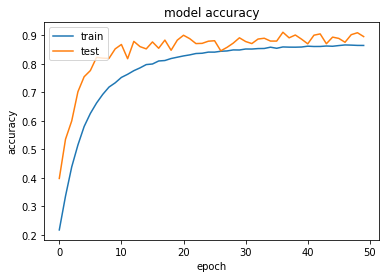

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

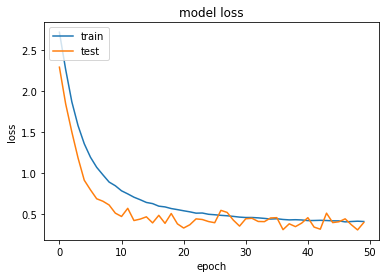

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

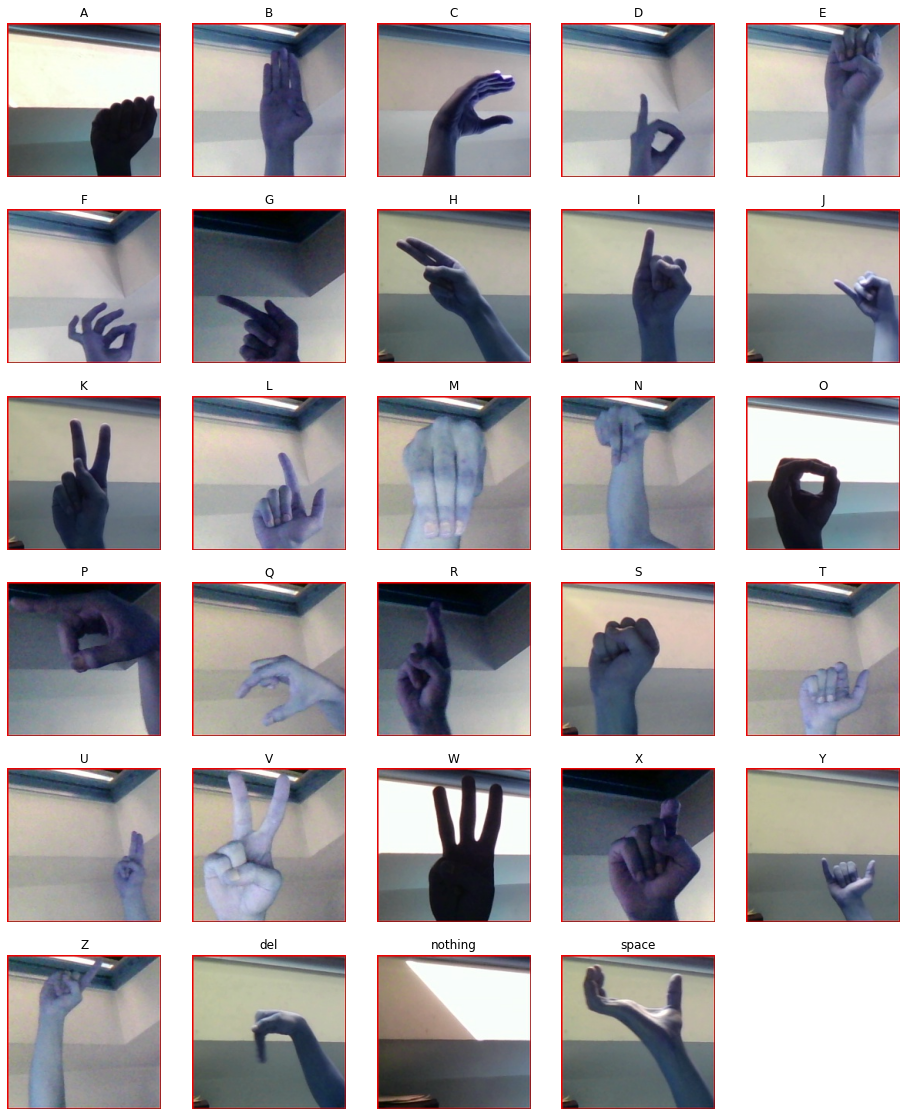

In [ ]:
from glob import glob
import numpy as np
import random
import cv2

TRAIN_DIR = 'asl_alphabet_train/asl_alphabet_train'

CLASSES = [folder[len(TRAIN_DIR) + 1:] for folder in glob(TRAIN_DIR + '/*')]
CLASSES.sort()

cols = 5
rows = int(np.ceil(len(CLASSES) / cols))
fig = plt.figure(figsize = (16, 20))

for i in range(len(CLASSES)):
  cls = CLASSES[i];
  img_path = TRAIN_DIR + '/' + cls + '/**'
  path_contents = glob(img_path)

  imgs = random.sample(path_contents, 1)
  sp  =  plt.subplot(rows, cols, i+1)
  plt.imshow(cv2.imread(imgs[0]))
  plt.title(cls)
  sp.axis('off')
plt.show()

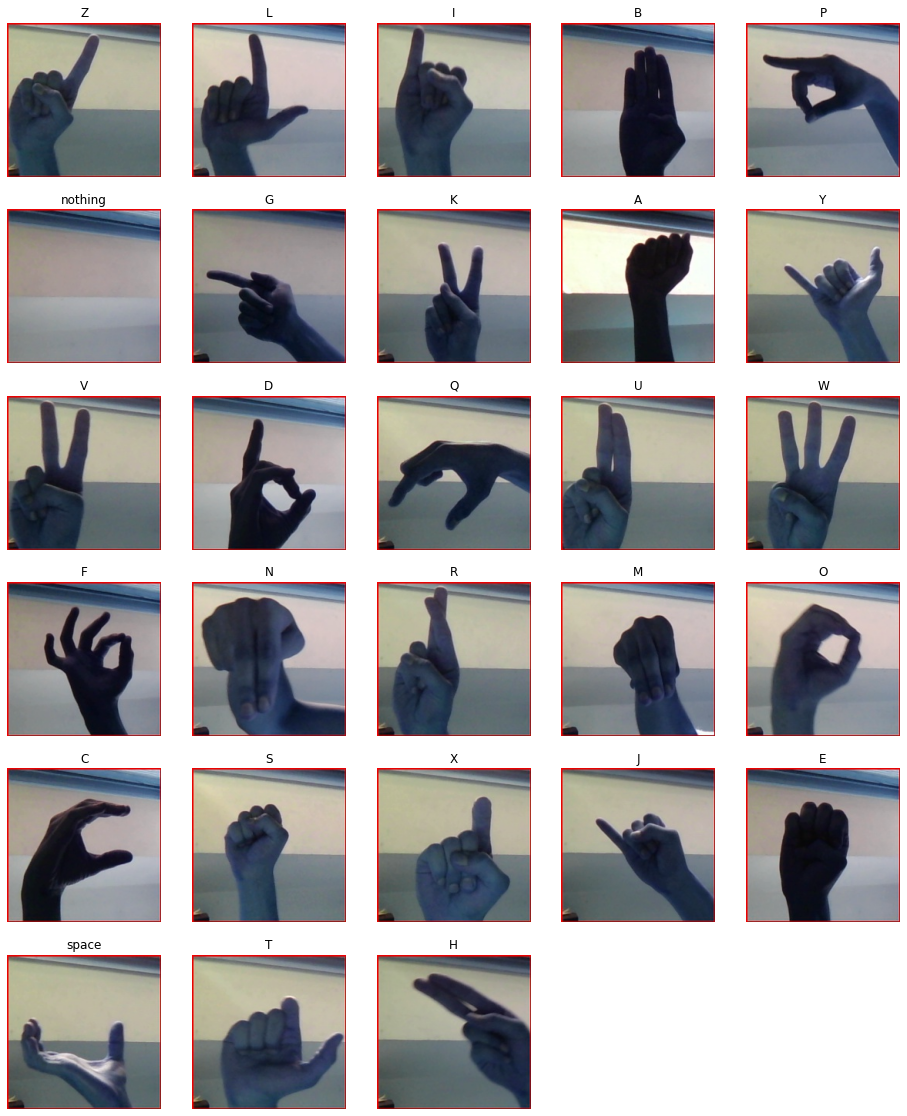

In [ ]:
import tensorflow as tf

TEST_DIR = 'asl_alphabet_test/asl_alphabet_test'
test_set = np.array(glob(TEST_DIR + '/*'))

cols = 5
rows = int(np.ceil(len(test_set) / cols))
fig = plt.figure(figsize = (16, 20))

for i in range(len(test_set)):
  sp = plt.subplot(rows, cols, i + 1)
  img = cv2.imread(test_set[i])
  plt.imshow(img)

  img = tf.keras.preprocessing.image.load_img(test_set[i], target_size=(64,64))
  img_array = tf.keras.preprocessing.image.img_to_array(img)/255
  img_array = np.expand_dims(img_array, axis = 0)
  predictions = model.predict(img_array)
  PREDICTED_CLASS = np.argmax(predictions, axis = 1)
  PREDICTED_CLASS = CLASSES[PREDICTED_CLASS[0]]
  plt.title(PREDICTED_CLASS)
  sp.axis('off')
plt.show()